In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import nltk
import re
from string import punctuation
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import PorterStemmer

In [17]:
# Download the punkt tokenizer 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/Pari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
# Download the stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/Pari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
# Load the dataset
data = pd.read_csv('../raw_data/Corona_NLP_test.csv')

In [23]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation
    text = ''.join([c for c in text if c not in punctuation])
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Stem the words
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    # Join the stemmed tokens back into a string
    processed_text = " ".join(stemmed_tokens)
    return processed_text



In [24]:
# Preprocess the text data in the OriginalTweet column
data['processed_text'] = data['OriginalTweet'].apply(preprocess_text)

# Save the preprocessed data
data.to_csv('../output/filtered_tweets.csv', index=False)



In [30]:
# Tokenize the preprocessed text
tokens = [nltk.word_tokenize(text) for text in data['processed_text']]
# Save the tokens to a file
with open('../output/tokens.txt', 'w') as file:
    for token in tokens:
        file.write(' '.join(token) + '\n')

In [31]:
# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [[token for token in tweet_tokens if token not in stop_words] for tweet_tokens in tokens]

# Convert filtered_tokens to DataFrame and save it to a CSV file
df_filtered_tokens = pd.DataFrame({'tokens': filtered_tokens})
df_filtered_tokens.to_csv('../output/filtered_tokens.csv', index=False)

In [25]:
# Count the frequency of each word in the corpus
word_freq = Counter()
for text in data['processed_text']:
    word_freq.update(text.split())

# Save the word frequencies
word_freq_df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['count'])
word_freq_df.to_csv('../output/word_frequencies.csv')



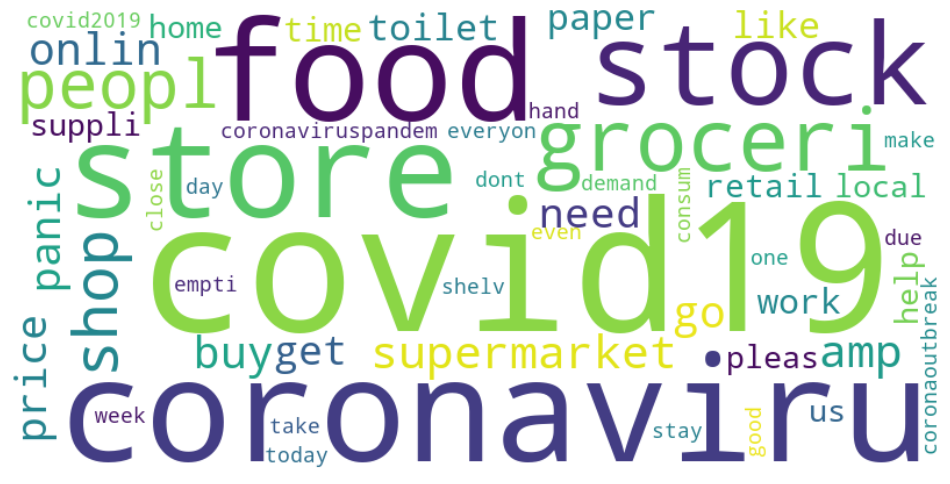

In [28]:
# Create a word cloud from the most frequent words
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate_from_frequencies(word_freq)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('../output/word_cloud.png')
plt.show()